# Tarea 1

Juan Pablo Rodas carnet 23007421

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [62]:
dataHP_Final = dataHP

## Imputacion

se filtraran las columnas que tienen mas de un 5% de valores null en ellas

In [17]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
len(cols_rescatables)

70

In [81]:
dataHP_Final = dataHP[cols_rescatables].copy()

de las columnas rescatables cuales son las que aun tienen nulls

In [23]:
cols_con_na = [col for col in cols_rescatables if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

se observa el tipo de datos de las columnas sobre las que se hara la imputacion

In [24]:
dataHP[cols_con_na].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
dtype: object

### Imputacion para datos numericos

In [27]:
dataHP['MasVnrArea'].isnull().mean()

0.005479452054794521

In [29]:
media = dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()

print(media)
print(mediana)

103.68526170798899
0.0


In [53]:
dataHP_num = pd.DataFrame()

dataHP_num['MasVnrArea']=dataHP['MasVnrArea']
dataHP_num['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP_num['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

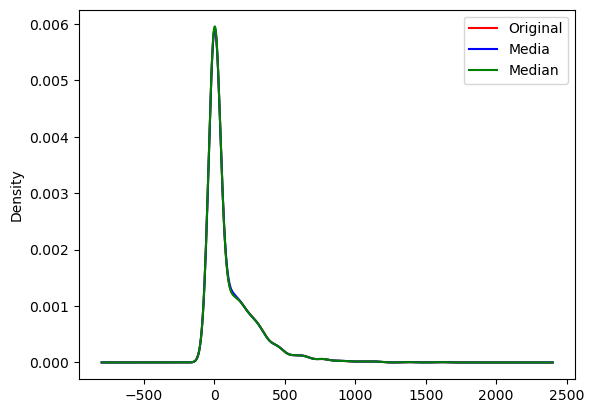

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP_num['MasVnrArea'].plot.density(color='red', label='Original')
dataHP_num['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
dataHP_num['MasVnrArea_Median'].plot.density(color='green', label='Median')
plt.legend()

no hay mayor diferencia entre hacer una pintutacion con media o mediana, por lo que se hara una imputacion por media en el dataset final

In [82]:
dataHP_Final['MasVnrArea'] = np.round(dataHP_Final['MasVnrArea'].fillna(media))

In [83]:
dataHP_Final['MasVnrArea'].isnull().mean()

0.0

### Imputacion para variables categoricas

#### MasVnrType

In [74]:
cat_varName = 'MasVnrType'

In [75]:
dataHP[cat_varName].isnull().mean()

0.005479452054794521

In [76]:
dataHP[cat_varName].value_counts()/len(dataHP)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

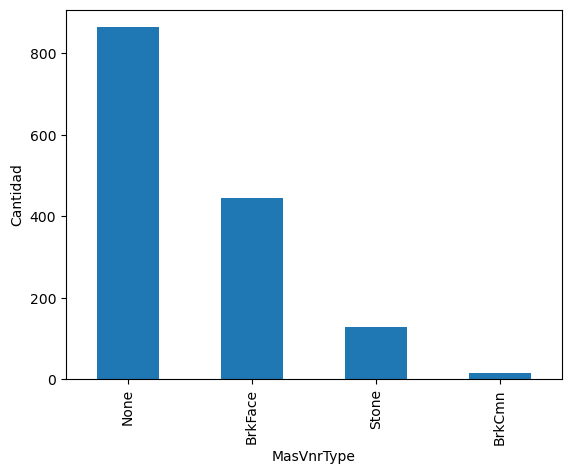

In [77]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

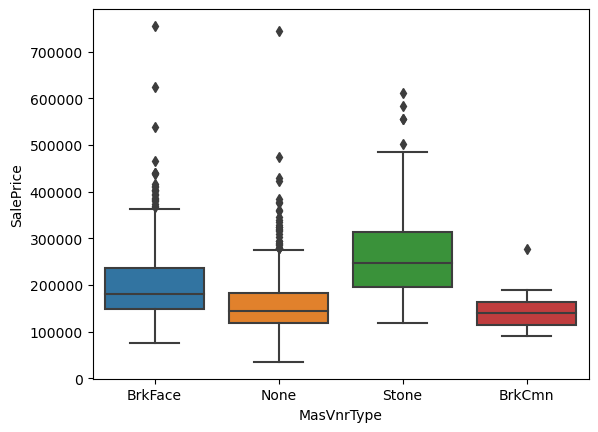

In [78]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

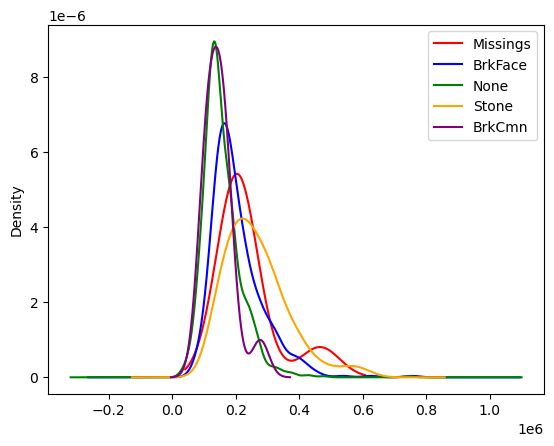

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataHP[dataHP[cat_varName] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataHP[dataHP[cat_varName] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataHP[dataHP[cat_varName] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Stone por lo que se hara una imputacion agregando los faltantes a Stone

In [84]:
dataHP_Final[cat_varName].fillna('Stone', inplace=True)

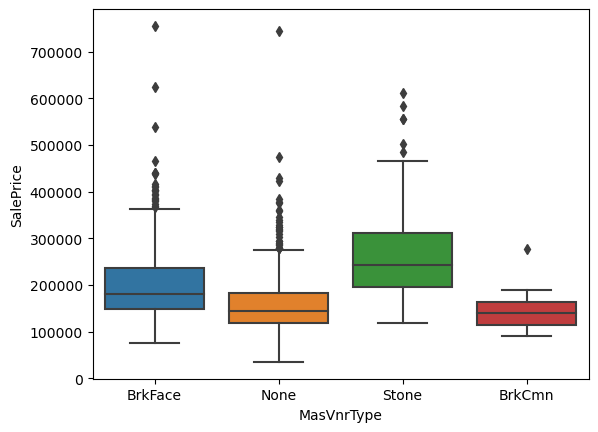

In [86]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

el boxplot muestra que no cambio mucho

#### BsmtQual

In [87]:
cat_varName = 'BsmtQual'

In [88]:
dataHP[cat_varName].isnull().mean()

0.025342465753424658

In [89]:
dataHP[cat_varName].value_counts()/len(dataHP)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

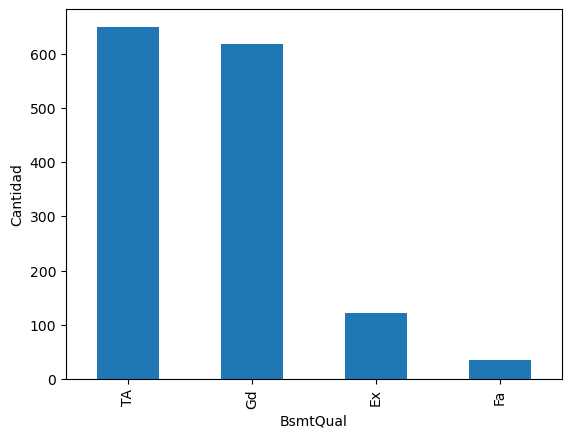

In [90]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

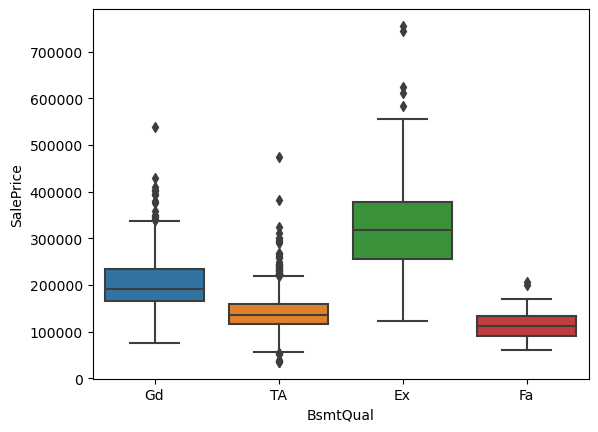

In [91]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

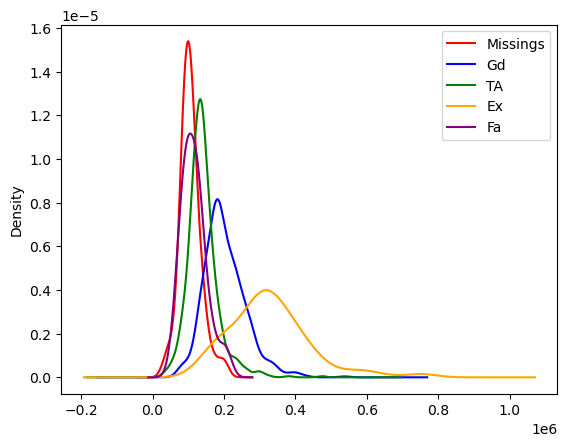

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'TA']['SalePrice'].plot(kind="kde", color="green", label="TA")
dataHP[dataHP[cat_varName] == 'Ex']['SalePrice'].plot(kind="kde", color="orange", label="Ex")
dataHP[dataHP[cat_varName] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Fa por lo que se hara una imputacion agregando los faltantes a Fa

In [93]:
dataHP_Final[cat_varName].fillna('Fa', inplace=True)

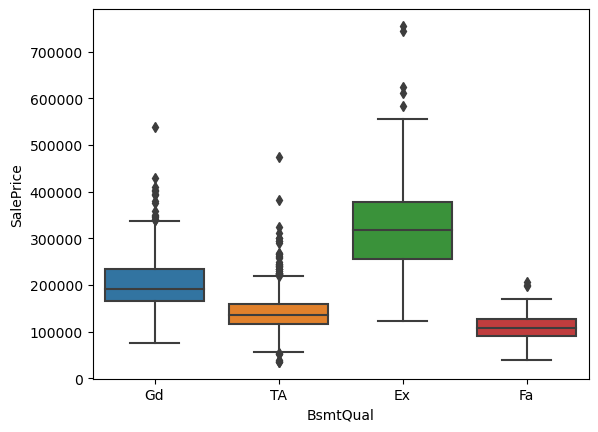

In [94]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtCond

In [98]:
cat_varName = 'BsmtCond'

In [99]:
dataHP[cat_varName].isnull().mean()

0.025342465753424658

In [100]:
dataHP[cat_varName].value_counts()/len(dataHP)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

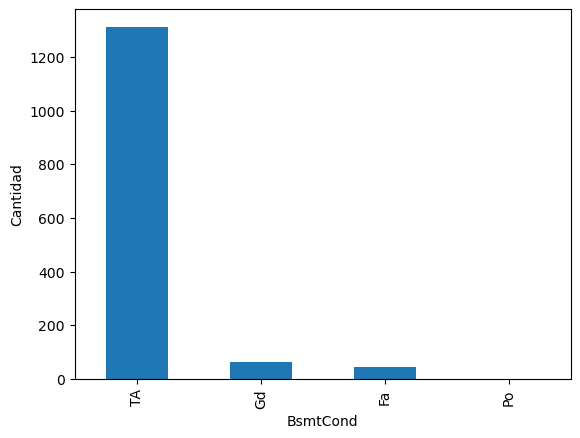

In [101]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

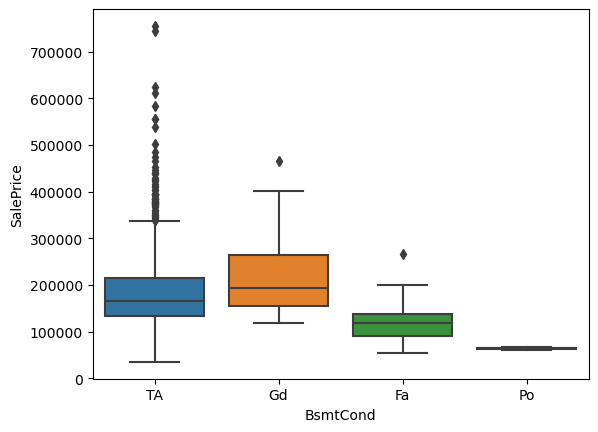

In [102]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

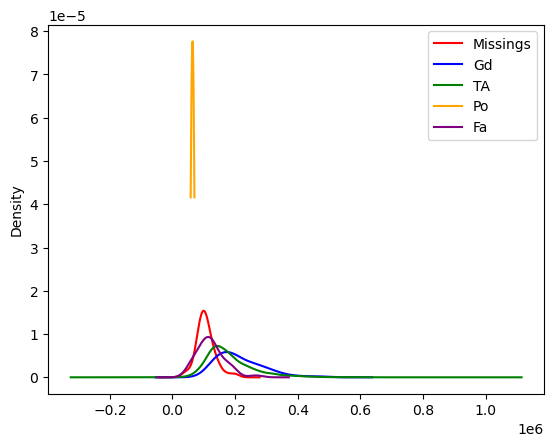

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'TA']['SalePrice'].plot(kind="kde", color="green", label="TA")
dataHP[dataHP[cat_varName] == 'Po']['SalePrice'].plot(kind="kde", color="orange", label="Po")
dataHP[dataHP[cat_varName] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Fa por lo que se hara una imputacion agregando los faltantes a Fa

In [105]:
dataHP_Final[cat_varName].fillna('Fa', inplace=True)

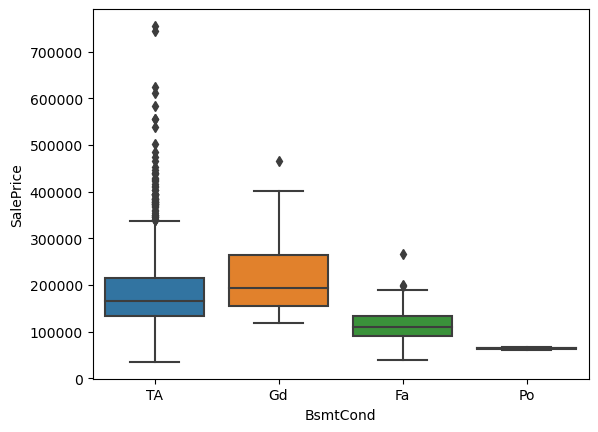

In [106]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtExposure

In [107]:
cat_varName = 'BsmtExposure'

In [108]:
dataHP[cat_varName].isnull().mean()

0.026027397260273973

In [109]:
dataHP[cat_varName].value_counts()/len(dataHP)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

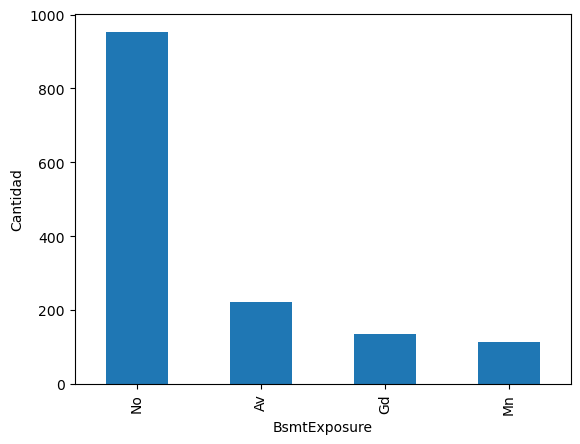

In [110]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

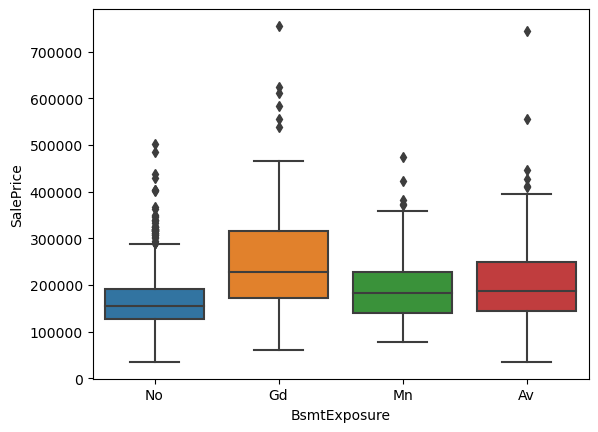

In [111]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

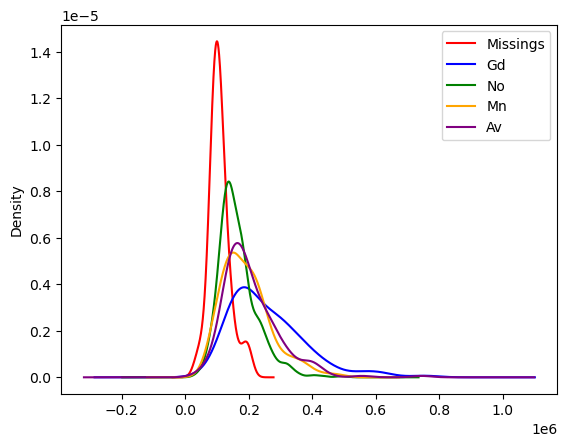

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'No']['SalePrice'].plot(kind="kde", color="green", label="No")
dataHP[dataHP[cat_varName] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataHP[dataHP[cat_varName] == 'Av']['SalePrice'].plot(kind="kde", color="purple", label="Av")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable No por lo que se hara una imputacion agregando los faltantes a No

In [113]:
dataHP_Final[cat_varName].fillna('No', inplace=True)

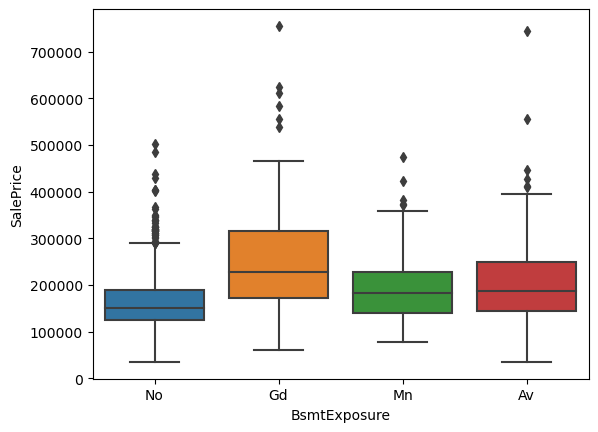

In [114]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()